# Data Pre-Processing

In [354]:
import pandas as pd
import numpy as np

origin_data = pd.read_csv('./dataset/sleep-time.csv')
origin_data.head(10)

,Dấu thời gian,Bạn đánh dấu những khung giờ mà bản thân trong trạng thái ngủ nhé,Tuổi hiện tại của bạn (chỉ điền số giúp chúng mình nha)?,Bạn có hài lòng với khung giờ ngủ hiện tại không?,Sức khoẻ của bạn đang ở mức nào?
0,30/09/2021 9:52:28,"1h - 3h, 3h - 5h, 5h - 7h, 7h - 9h",20,Không,Tệ
1,30/09/2021 9:55:40,"23h - 1h, 1h - 3h, 3h - 5h, 11h - 13h",20,Có,Rất tốt
2,30/09/2021 9:57:11,"21h - 23h, 23h - 1h, 1h - 3h, 3h - 5h",21,Có,Rất tốt
3,30/09/2021 9:58:00,"1h - 3h, 3h - 5h, 5h - 7h",20,Có,Bình thường
4,30/09/2021 9:59:04,"1h - 3h, 3h - 5h, 5h - 7h, 11h - 13h, 19h - 21h",21,Không,Bình thường
5,30/09/2021 10:00:32,"3h - 5h, 15h - 17h",21,Không,\rTệ
6,30/09/2021 10:04:17,"23h - 1h, 1h - 3h, 3h - 5h, 5h - 7h",21,Có,Bình thường
7,30/09/2021 10:05:43,"1h - 3h, 3h - 5h, 5h - 7h",40,Có,Bình thường
8,30/09/2021 10:06:15,"23h - 1h, 1h - 3h",21,Có,Tốt
9,30/09/2021 10:07:47,"23h - 1h, 1h - 3h, 3h - 5h, 5h - 7h",20,Có,Bình thường


In [355]:
# drop first column
new_data = origin_data.copy()
new_data.drop(new_data.columns[0], inplace=True, axis=1)

# rename featire
new_data.columns = ['time', 'old', 'feels', 'status'] 

# clear by regex
new_data['status'] = new_data['status'].apply(str).str.strip()
new_data['status'] = new_data['status'].apply(str).str.replace('\\r', '')

# print(new_data.head(15)) 

# add 12 time frame features
empty_col = np.array([0]*new_data.shape[0])
key_time_frame = ['23h-1h', '1h-3h', '3h-5h', '5h-7h', '7h-9h', '9h-11h', '11h-13h', '13h-15h', '15h-17h', '17h-19h', '19h-21h', '21h-23h']
for time_frame in key_time_frame:
    new_data[time_frame] = empty_col
    
# fill data into 12 time frame features
time_list = new_data['time'].values
time_list_length = len(time_list)
for i in range(time_list_length):
    time_str = str(time_list[i])
    time_frame_selected = time_str.replace(" ", "").split(",")
    new_data.loc[i, time_frame_selected] = 1

# remove time column
new_data.drop(new_data.columns[0], inplace=True, axis=1)

# one-hot encode to feels feature
length_row = new_data.shape[0]
for i in range(length_row):
    if new_data.loc[i, 'feels'] == "Không":
        new_data.loc[i, 'feels'] = 0
    else:
        new_data.loc[i, 'feels'] = 1
        
# add column total hours
for i in range(length_row):
    new_data.loc[i, 'total_hours'] = sum(new_data.loc[i, key_time_frame].values)*2
    
# encode status feature
key_status = {
    1: "rất tốt",
    2: "tốt",
    3: "bình thường",
    4: "tệ",
    5: "rất tệ"
}

for i in range(length_row):
    for key in key_status:
        if str(new_data.loc[i, 'status']).lower() == key_status[key]:
            new_data.loc[i, 'result'] = key
            
# remove status column
new_data.drop('status', inplace=True, axis=1)

 
new_data.head(10)

,old,feels,23h-1h,1h-3h,3h-5h,5h-7h,7h-9h,9h-11h,11h-13h,13h-15h,15h-17h,17h-19h,19h-21h,21h-23h,total_hours,result
0,20,0,0,1,1,1,1,0,0,0,0,0,0,0,8.0,4.0
1,20,1,1,1,1,0,0,0,1,0,0,0,0,0,8.0,1.0
2,21,1,1,1,1,0,0,0,0,0,0,0,0,1,8.0,1.0
3,20,1,0,1,1,1,0,0,0,0,0,0,0,0,6.0,3.0
4,21,0,0,1,1,1,0,0,1,0,0,0,1,0,10.0,3.0
5,21,0,0,0,1,0,0,0,0,0,1,0,0,0,4.0,4.0
6,21,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,3.0
7,40,1,0,1,1,1,0,0,0,0,0,0,0,0,6.0,3.0
8,21,1,1,1,0,0,0,0,0,0,0,0,0,0,4.0,2.0
9,20,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,3.0


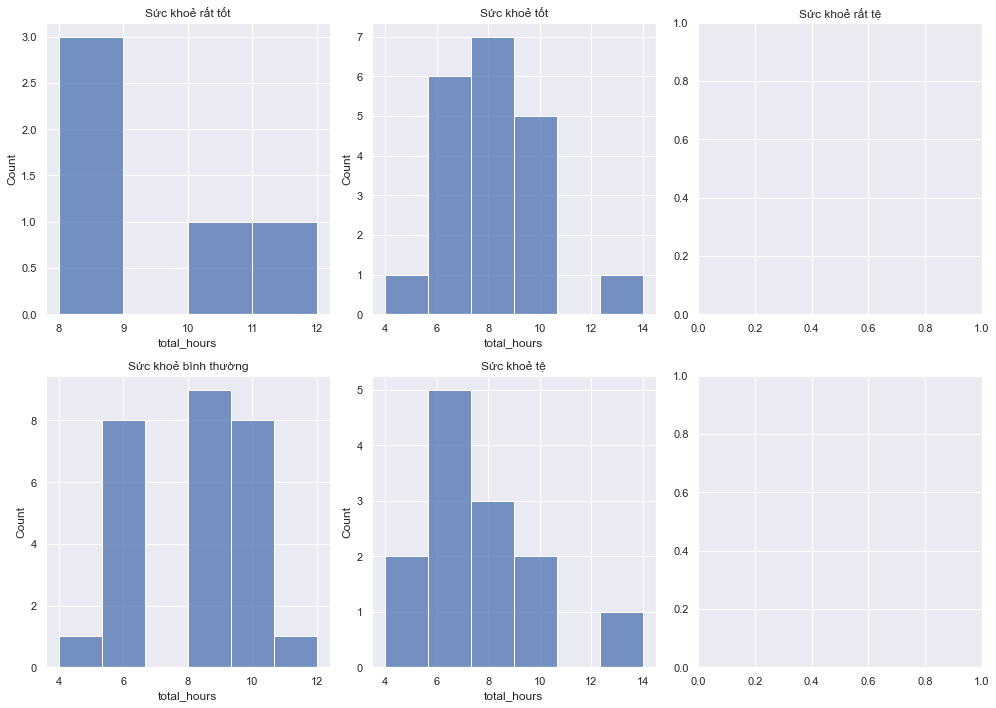

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(2, 3,figsize=(14, 10))
# sns.despine(f)

def histplot_total_time(key, ax, title):
    # print(new_data[new_data['result'] == key]['total_hours'].shape)
    sns.histplot(
        data= new_data[new_data['result'] == key]['total_hours'],
        ax=ax,
    )
    ax.set_title(title)

histplot_total_time(1, ax[0, 0], "Sức khoẻ rất tốt")
histplot_total_time(2, ax[0, 1], "Sức khoẻ tốt")
histplot_total_time(3, ax[1, 0], "Sức khoẻ bình thường")
histplot_total_time(4, ax[1, 1], "Sức khoẻ tệ")
histplot_total_time(5, ax[0, 2], "Sức khoẻ rất tệ")
plt.tight_layout()
plt.rcParams["figure.autolayout"] = True
plt.subplots_adjust(hspace = 0.25)


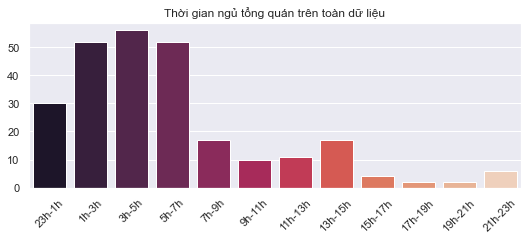

In [357]:

sum_time_frame_data = []
for time_frame in key_time_frame:
    sum_time_frame_data.append(sum(new_data[time_frame].values))
# sum_time_frame_data

sns.barplot(x=key_time_frame, y=sum_time_frame_data, palette="rocket")
plt.title("Thời gian ngủ tổng quán trên toàn dữ liệu")
plt.xticks(rotation=45)
plt.rcParams["figure.autolayout"] = True
plt.show()

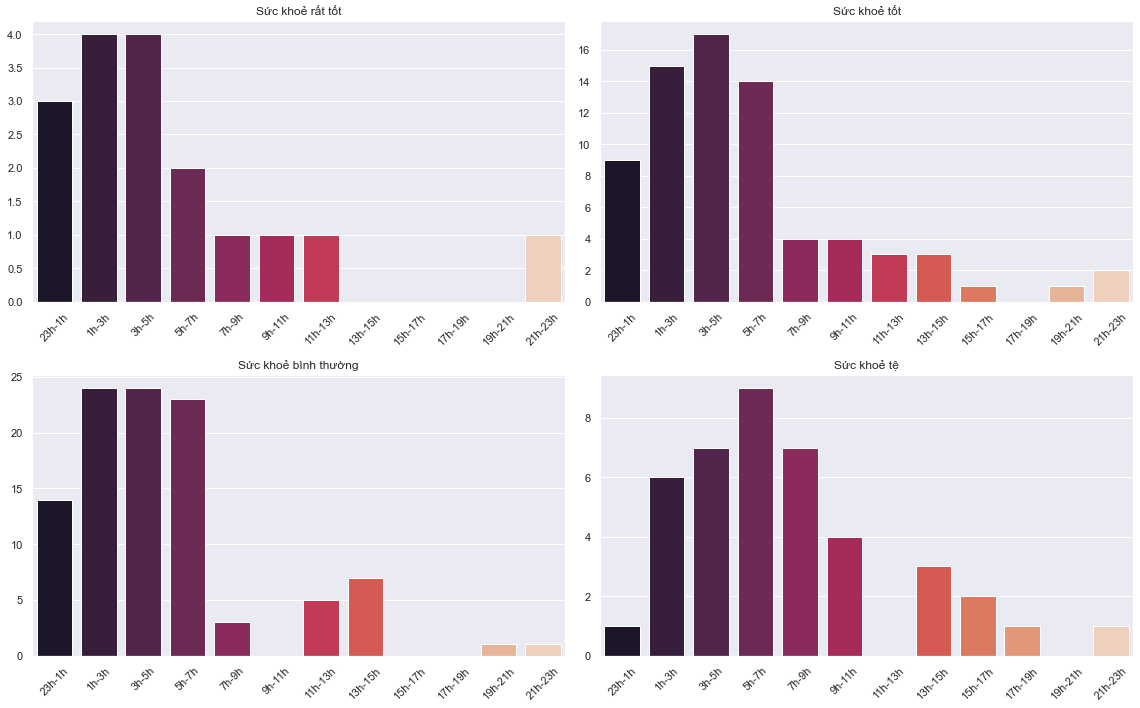

In [358]:
def barplot_time_frame(data, total_hours, ax, title):
    sum_time_frame_data = []
    data = data[data['total_hours'] <= total_hours]
    for time_frame in key_time_frame:
        sum_time_frame_data.append(sum(data[time_frame].values))
    sns.barplot(x=key_time_frame, y=sum_time_frame_data, palette="rocket", ax=ax)
    ax.set_title(title)
    ax.tick_params(labelrotation=45, axis='x')

f, ax = plt.subplots(2, 2,figsize=(16, 10))

max_total_hours = 10
barplot_time_frame(new_data[new_data['result'] == 1], max_total_hours, ax[0,0], "Sức khoẻ rất tốt")
barplot_time_frame(new_data[new_data['result'] == 2], max_total_hours, ax[0,1], "Sức khoẻ tốt")
barplot_time_frame(new_data[new_data['result'] == 3], max_total_hours, ax[1,0], "Sức khoẻ bình thường")
barplot_time_frame(new_data[new_data['result'] == 4], max_total_hours, ax[1,1], "Sức khoẻ tệ")

plt.tight_layout()
plt.rcParams["figure.autolayout"] = True
plt.show()

### Show plot each log

In [359]:
# data = new_data[(new_data['total_hours'] <= 6 )& (new_data['result'] == 3)]
# data.reset_index(inplace=True)
# # data.head()

# for i in range(data.shape[0]):
#     f, ax = plt.subplots(figsize=(10, 5))
#     sns.barplot(x=key_time_frame, y=data.loc[i, key_time_frame], palette="rocket")
#     # ax.set_title(title)
#     plt.xticks(rotation=45)   

# Train Model

In [360]:
new_data.head(15)

,old,feels,23h-1h,1h-3h,3h-5h,5h-7h,7h-9h,9h-11h,11h-13h,13h-15h,15h-17h,17h-19h,19h-21h,21h-23h,total_hours,result
0,20,0,0,1,1,1,1,0,0,0,0,0,0,0,8.0,4.0
1,20,1,1,1,1,0,0,0,1,0,0,0,0,0,8.0,1.0
2,21,1,1,1,1,0,0,0,0,0,0,0,0,1,8.0,1.0
3,20,1,0,1,1,1,0,0,0,0,0,0,0,0,6.0,3.0
4,21,0,0,1,1,1,0,0,1,0,0,0,1,0,10.0,3.0
5,21,0,0,0,1,0,0,0,0,0,1,0,0,0,4.0,4.0
6,21,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,3.0
7,40,1,0,1,1,1,0,0,0,0,0,0,0,0,6.0,3.0
8,21,1,1,1,0,0,0,0,0,0,0,0,0,0,4.0,2.0
9,20,1,1,1,1,1,0,0,0,0,0,0,0,0,8.0,3.0


In [372]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
scaler = StandardScaler()

features_data = new_data.iloc[:, 0:-1].copy()
labels_data = new_data['result'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    features_data.values, labels_data.values, test_size=0.3, random_state=7)  # 70% training and 30% test

# encoding train labels 
encoder.fit(y_train)
y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
y_test = encoder.transform(y_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, y_train)


/Users/attorneyking/opt/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [373]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best score for training data: 0.48484848484848486 

Best C: 1 

Best Kernel: linear 

Best Gamma: scale 



In [378]:
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))


In [376]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,Y_pred_label))
print("\n")
print(classification_report(y_test,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , y_test ))

svm_model.score

[[0 0 1 0]
 [0 0 0 2]
 [0 0 0 3]
 [0 0 1 0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       3.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       7.0
   macro avg       0.00      0.00      0.00       7.0
weighted avg       0.00      0.00      0.00       7.0

Training set score for SVM: 0.706897
Testing  set score for SVM: 0.428571


/Users/attorneyking/opt/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>